In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

file_to_load = "crash_info.csv"

# Read Purchasing File and store into Pandas data frame
traffic_df = pd.read_csv(file_to_load)
traffic_df.head()

,X,Y,OBJECTID,ACC_ID,ROAD_NO,ROAD_NAME,COMMON_ROAD_NAME,CWAY,SLK,INTERSECTION_NO,...,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,115.792274,-32.029452,27585440,10231294,1190012,Preston Point Rd,Preston Point Rd,S,0.86,47160.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
1,115.821106,-31.901343,27585441,10231300,H561,Hutton St on to Mitchell Fwy (Southbound),Hutton St on to Mitchell Fwy (Southbound),S,0.00,4347.0,...,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0
2,115.970937,-32.066115,27585442,10231306,1040003,Spencer Rd,Spencer Rd,L,4.97,43773.0,...,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
3,115.852685,-31.952160,27585443,10231312,1240111,Hay St,Hay St,S,2.92,NaN,...,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
4,115.949014,-31.906427,27585444,10231318,1110017,Palmerston St,Palmerston St,S,0.47,37514.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0


In [8]:
severity_groupby=traffic_df.groupby("SEVERITY")
severity_count=severity_groupby["ACC_ID"].nunique()
severity_count


SEVERITY
Fatal          746
Hospital      6928
Medical      17779
PDO Major    72991
PDO Minor    38232
Name: ACC_ID, dtype: int64

In [7]:
fatal = traffic_df.loc[traffic_df["SEVERITY"] == "Fatal"]
fatal_count = len(fatal["ACC_ID"].unique())
fatal_count

hospital = traffic_df.loc[traffic_df["SEVERITY"] == "Hospital"]
hospital_count = len(hospital["ACC_ID"].unique())
hospital_count  

medical = traffic_df.loc[traffic_df["SEVERITY"] == "Medical"]
medical_count = len(medical["ACC_ID"].unique())
medical_count

crash_count = fatal_count + hospital_count + medical_count

fatal_percentage = "{:.2f}%".format(fatal_count / crash_count * 100)
fatal_percentage

hospital_percentage = "{:.2f}%".format(hospital_count / crash_count * 100)
hospital_percentage

medical_percentage = "{:.2f}%".format(medical_count / crash_count * 100)
medical_percentage


severity_summary = pd.DataFrame({
    "severity category":["Fatal", "Hospital", "Medical"],
    "Total Count":[fatal_count, hospital_count, medical_count],
    "Percentage of Severity":[fatal_percentage, hospital_percentage, medical_percentage],})

severity_summary=severity_summary.set_index("severity category")
severity_summary


,Total Count,Percentage of Severity
severity category,,
Fatal,746,2.93%
Hospital,6928,27.22%
Medical,17779,69.85%


In [10]:
severity_data = pd.DataFrame({
    "severity category":["Fatal", "Hospital", "Medical"],
    "Total Count":[fatal_count, hospital_count, medical_count],})

severity_data


,severity category,Total Count
0,Fatal,746
1,Hospital,6928
2,Medical,17779


Text(0, 0.5, 'Count of Accidents')

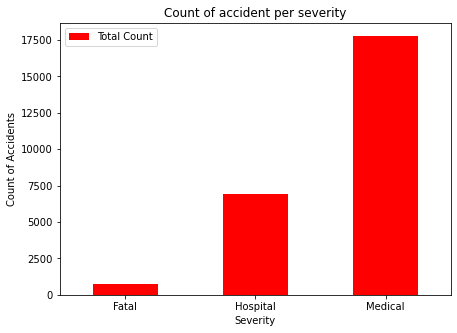

In [26]:
bar_plot_data = severity_summary.plot.bar(figsize = (7,5), fontsize = 10, color = 'red', rot='horizontal',title='Count of accident per severity')

bar_plot_data.set_xlabel("Severity")
bar_plot_data.set_ylabel("Count of Accidents")

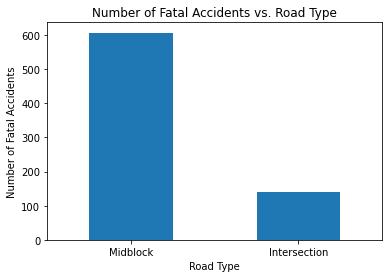

In [29]:
severity_type_groupby = traffic_df.groupby(["SEVERITY"])["ACCIDENT_TYPE"].value_counts()
severity_type_groupby

severity_type_groupby["Fatal"].plot(kind="bar", title="Number of Fatal Accidents vs. Road Type",rot='horizontal')
plt.ylabel("Number of Fatal Accidents")
plt.xlabel("Road Type")

plt.show()

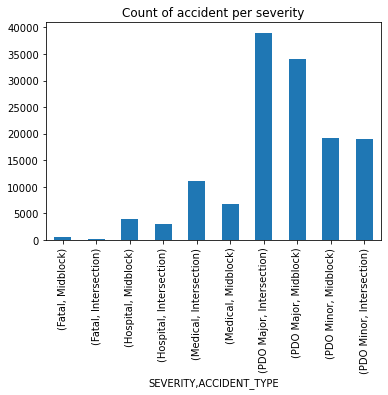

In [10]:
bar_plot_data = severity_type_groupby.plot.bar(rot='vertical',title='Count of accident per severity')

In [11]:
midblock = crash_data.loc[crash_data["ACCIDENT_TYPE"] == "Midblock"]
midblock_count = len(midblock["ACC_ID"].unique())
midblock_count

intersection = crash_data.loc[crash_data["ACCIDENT_TYPE"] == "Intersection"]
intersection_count = len(intersection["ACC_ID"].unique())
intersection_count 

midblock_percentage = "{:.2f}%".format(midblock_count / crash_count * 100)
midblock_percentage

intersection_percentage = "{:.2f}%".format(intersection_count / crash_count * 100)
intersection_percentage

accident_summary = pd.DataFrame({
    "accident type category":["Midblock", "Intersection"],
    "Total Count":[midblock_count, intersection_count],
    "Percentage of Accident Type":[midblock_percentage, intersection_percentage],})

accident_summary

,accident type category,Total Count,Percentage of Accident Type
0,Midblock,64527,47.21%
1,Intersection,72149,52.79%


In [12]:
critical_value = st.chi2.ppf(q=0.95, df = 1)
critical_value

3.841458820694124

In [13]:
accident_data = crash_data.groupby('ACCIDENT_TYPE').count()['ACC_ID']
accident_df = pd.DataFrame(accident_data)

accident_stats = pd.DataFrame({
    "accident type category":["Midblock", "Intersection"],
    "observed":[midblock_count, intersection_count],
    "expected":[68338, 68338],})
accident_stats


,accident type category,observed,expected
0,Midblock,64527,68338
1,Intersection,72149,68338


In [14]:
st.chisquare(accident_stats['observed'], accident_stats['expected'])

#reject null hypothesis - we conclude that the differences seen in number of accidents per type of accident are statistically significant.accident_stats

Power_divergenceResult(statistic=425.0554888934414, pvalue=1.9367554530148811e-94)

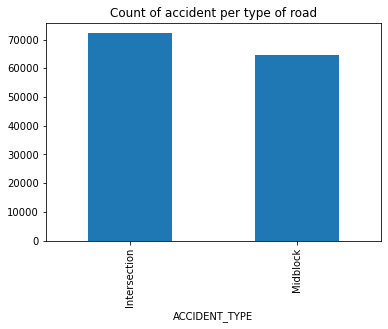

In [15]:
bar_plot_data = accident_data.plot.bar(rot='vertical',title='Count of accident per type of road')

In [16]:
time_bins = [0, 359, 659, 959, 1259, 1559, 1859, 2159, 2359]
time_names = ["0-3", "4-6", "7-9", "10-12", "13-15", "16-18", "19-21", "22-24"]

group_time_df = crash_data
group_time_df["Time Interval"] = pd.cut(group_time_df["CRASH_TIME"],time_bins, labels=time_names)
group_time_df

group_time_df["Time Interval"].value_counts()

16-18    33435
13-15    29911
7-9      24744
10-12    23769
19-21    10713
4-6       6425
22-24     3950
0-3       3144
Name: Time Interval, dtype: int64

In [32]:
severity_time_groupby = group_time_df.groupby(["SEVERITY"])["Time Interval"].value_counts()
severity_time_groupby



SEVERITY   Time Interval
Fatal      13-15              142
           16-18              121
           10-12              117
           19-21              100
           0-3                 75
           4-6                 74
           7-9                 64
           22-24               51
Hospital   16-18             1489
           13-15             1433
           10-12             1136
           7-9                944
           19-21              781
           4-6                430
           22-24              343
           0-3                318
Medical    16-18             4459
           13-15             3868
           7-9               3864
           10-12             2980
           19-21             1125
           4-6                812
           22-24              345
           0-3                243
PDO Major  16-18            18152
           13-15            15889
           7-9              12668
           10-12            12657
           19-21       

In [41]:
severity_time_groupby["Fatal"]

Time Interval
13-15    142
16-18    121
10-12    117
19-21    100
0-3       75
4-6       74
7-9       64
22-24     51
Name: Time Interval, dtype: int64

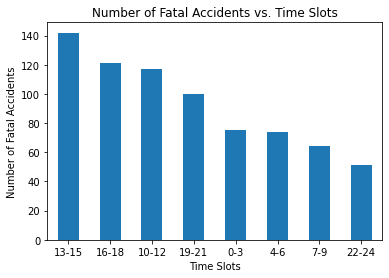

In [44]:
severity_time_groupby["Fatal"].plot(kind="bar", title="Number of Fatal Accidents vs. Time Slots",rot=0)
plt.ylabel("Number of Fatal Accidents")
plt.xlabel("Time Slots")
plt.show()